# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

In [18]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

In [3]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [22]:
penguins = pd.get_dummies(penguins)*1
penguins.head()
# dummified values - species, island, sex

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [23]:
# 1. Best multiple linear regression models - Model 2 (predictors: bill_length_mm, species)

X = penguins[["bill_length_mm", "species_Adelie", "species_Chinstrap", "species_Gentoo"]]
y = penguins["bill_depth_mm"]

In [24]:
mlr = LinearRegression().fit(X, y)

In [25]:
y_pred = mlr.predict(X)

In [26]:
r2_mlr = r2_score(y, y_pred)
mse_mlr = mean_squared_error(y, y_pred)
print(f"R-squared MLR: {r2_mlr}")
print(f"MSE MLR: {mse_mlr}")

R-squared MLR: 0.7672810738905527
MSE MLR: 0.8997479189815042


In [38]:
# 2. Two kNN models (for different values of K)
# note: due to lack of clear examples and instruction of correct implementation of kNN and Decision tree model in python in the textbook, the following parts of assignment are accomplished

# define variables
X = penguins.drop(columns=["bill_depth_mm"])
y = penguins["bill_depth_mm"]

# create and fit the kNN model for two K values:

# k = 3
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(X, y)

# y prediciton
y_pred_3 = knn_3.predict(X)

# r2 and mse
r2_knn3 = r2_score(y, y_pred_3)
mse_knn3 = mean_squared_error(y, y_pred_3)

print(f"R-squared kNN (k=3): {r2_knn3}")
print(f"MSE kNN (k=3): {mse_knn3}")


R-squared kNN (k=3): 0.7223264151732927
MSE kNN (k=3): 1.0735535535535536


In [39]:
# k = 10
knn_10 = KNeighborsRegressor(n_neighbors=10)
knn_10.fit(X, y)

# y prediciton
y_pred_10 = knn_10.predict(X)

# r2 and mse
r2_knn10 = r2_score(y, y_pred_10)
mse_knn10 = mean_squared_error(y, y_pred_10)

print(f"R-squared kNN (k=10): {r2_knn10}")
print(f"MSE kNN (k=10): {mse_knn10}")

R-squared kNN (k=10): 0.5413172480129516
MSE kNN (k=10): 1.7733789789789791


With larger k, the R-squared decreased while the MSE increased. Model with lower k-value is better fitted and provides more accurate prediction.

In [40]:
# Decision tree model

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, y)

# y prediction
y_pred_tree = tree_model.predict(X)

# r2 and mse
r2_tree = r2_score(y, y_pred_tree)
mse_tree = mean_squared_error(y, y_pred_tree)

print(f"R-squared Decision Tree: {r2_tree}")
print(f"MSE Decision Tree: {mse_tree}")

R-squared Decision Tree: 1.0
MSE Decision Tree: 0.0


Decision tree model yields the highest R-squared and lowest MSE when trained on full data.

# Plots

In [42]:
# summarizing data
r_squared_results = pd.DataFrame({
    "Model": ["MLR", "KNN3", "KNN10", "DT"],
   # "Dataset": ["Train", "Test", "Train", "Test", "Train", "Test", "Train", "Test"],
    "R-squared": [r2_mlr, r2_knn3, r2_knn10, r2_tree]
})
print(r_squared_results)

   Model  R-squared
0    MLR   0.767281
1   KNN3   0.722326
2  KNN10   0.541317
3     DT   1.000000


In [43]:
mse_results = pd.DataFrame({
    "Model": ["MLR", "KNN3", "KNN10", "DT"],
  #  "Dataset": ["Train", "Test", "Train", "Test", "Train", "Test", "Train", "Test"],
    "MSE": [mse_mlr, mse_knn3, mse_knn10, mse_tree]
})
print(mse_results)

   Model       MSE
0    MLR  0.899748
1   KNN3  1.073554
2  KNN10  1.773379
3     DT  0.000000


In [56]:
results_df = r_squared_results.merge(mse_results, on = 'Model')
results_df

,Model,R-squared,MSE
0,MLR,0.767281,0.899748
1,KNN3,0.722326,1.073554
2,KNN10,0.541317,1.773379
3,DT,1.000000,0.000000


In [58]:
# melting for ploting in plotnine
melted_results = results_df.melt(id_vars='Model', value_vars=['R-squared', 'MSE'], var_name='Metric', value_name='Value')
#melted_results

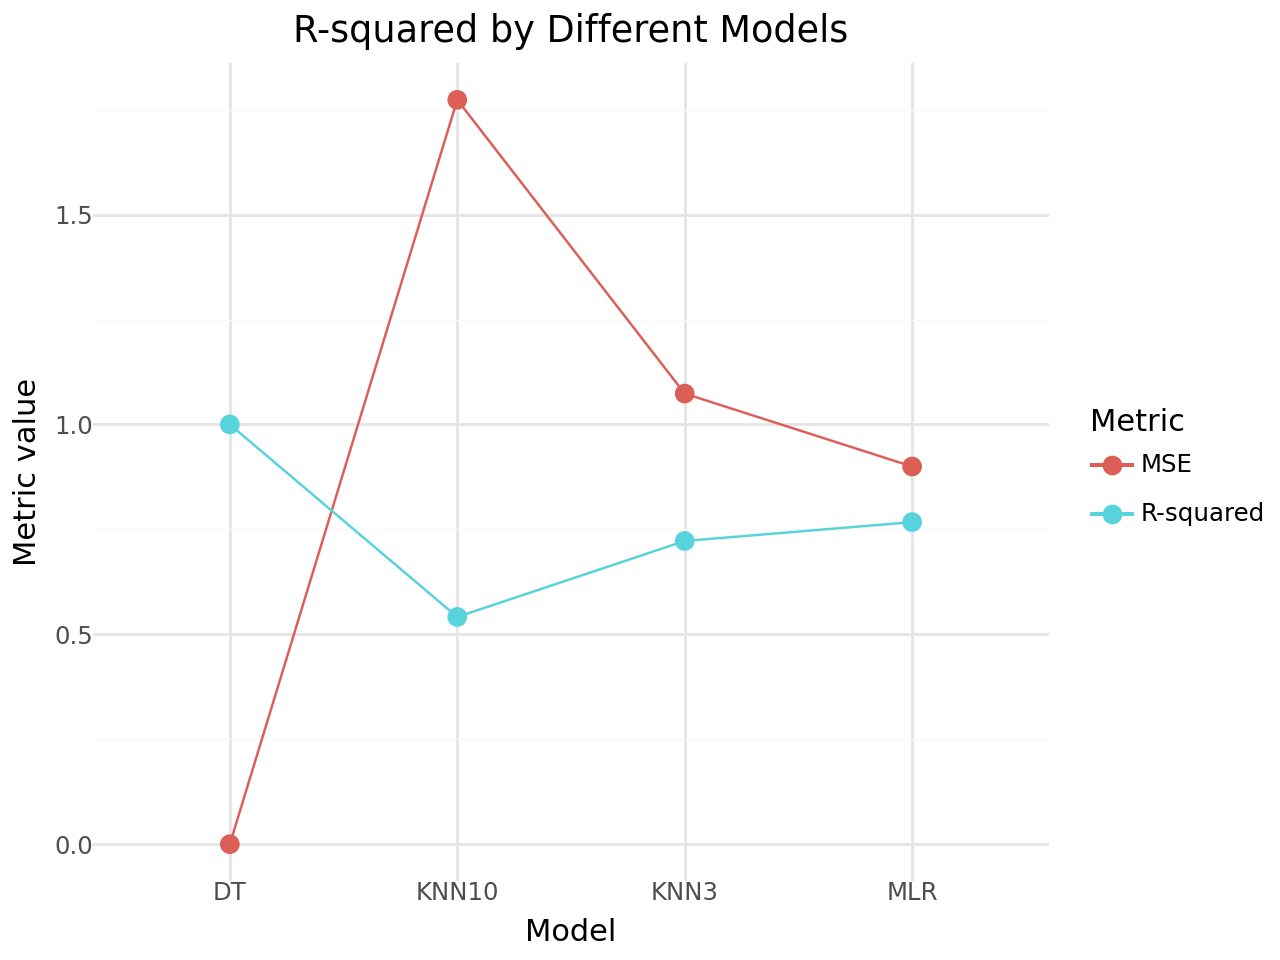

In [59]:
from plotnine import *

(ggplot(melted_results, aes(x='Model', y='Value', color='Metric', group ='Metric'))
    + geom_line()
    + geom_point(size=3)
    + labs(title='R-squared by Different Models', x='Model', y='Metric value')
    + theme_minimal()
)

# extra part:
out of curiosity, fitting the models with Train Test split

In [31]:
# LR Model 2:
X = penguins[["bill_length_mm", "species_Adelie", "species_Chinstrap", "species_Gentoo"]]
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)

print(f"R-squared LR: {r2_lr}")
print(f"MSE LR: {mse_lr}")


R-squared LR: 0.6576388521431493
MSE LR: 1.2875510867555957


In [35]:
# Define variables for other models
X = penguins.drop(columns=["bill_depth_mm"])
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# X.head()

In [32]:
# KNN Model k=3

knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(X_train, y_train)

y_pred_3 = knn_3.predict(X_test)

r2_knn3 = r2_score(y_test, y_pred_3)
mse_knn3 = mean_squared_error(y_test, y_pred_3)

print(f"R-squared kNN (k=3): {r2_knn3}")
print(f"MSE kNN (k=3): {mse_knn3}")

R-squared kNN (k=3): 0.26020427197725093
MSE kNN (k=3): 2.782222222222222


In [36]:
# KNN Model k=10

knn_10 = KNeighborsRegressor(n_neighbors=10)
knn_10.fit(X_train, y_train)

y_pred_10 = knn_10.predict(X_test)

r2_knn10 = r2_score(y_test, y_pred_10)
mse_knn10 = mean_squared_error(y_test, y_pred_10)

print(f"R-squared kNN (k=10): {r2_knn10}")
print(f"MSE kNN (k=10): {mse_knn10}")

R-squared kNN (k=10): 0.45686772667817055
MSE kNN (k=10): 2.0426107142857144


In [37]:
# Decision tree model

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, y)

# y prediction
y_pred_tree = tree_model.predict(X)

# r2 and mse
r2_tree = r2_score(y, y_pred_tree)
mse_tree = mean_squared_error(y, y_pred_tree)

print(f"R-squared Decision Tree: {r2_tree}")
print(f"MSE Decision Tree: {mse_tree}")

R-squared Decision Tree: 1.0
MSE Decision Tree: 0.0
